In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the datasets (update the path as needed)
books = pd.read_csv(r"C:\Users\muthu\Downloads\books.csv")
ratings = pd.read_csv(r"C:\Users\muthu\Downloads\ratings.csv")

In [13]:
books["features"] = books["Title"] + " " + books["Author"] + " " + books["Genre"]
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books["features"])
content_similarity = cosine_similarity(tfidf_matrix)# Step 1: Combine features
books["features"] = books["Title"] + " " + books["Author"] + " " + books["Genre"]

# Step 2: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books["features"])

# Step 3: Compute cosine similarity matrix
content_similarity = cosine_similarity(tfidf_matrix)

# Step 4: Choose the index for "Harry Potter" (you said it's at index 0)
book_index = 0
book_title = books['Title'].iloc[book_index]

# Step 5: Get similarity scores
similar_books = list(enumerate(content_similarity[book_index]))

# Step 6: Sort scores, exclude the same book
sorted_books = sorted(similar_books, key=lambda x: x[1], reverse=True)[1:4]

# Step 7: Get indices of similar books
top_indices = [i[0] for i in sorted_books]

# Step 8: Display recommendations
print(f"Top 3 books similar to '{book_title}':\n")
print(books[['Title', 'Author']].iloc[top_indices])


Top 3 books similar to 'Harry Potter':

               Title          Author
1         The Hobbit  J.R.R. Tolkien
4      Percy Jackson    Rick Riordan
2  The Da Vinci Code       Dan Brown


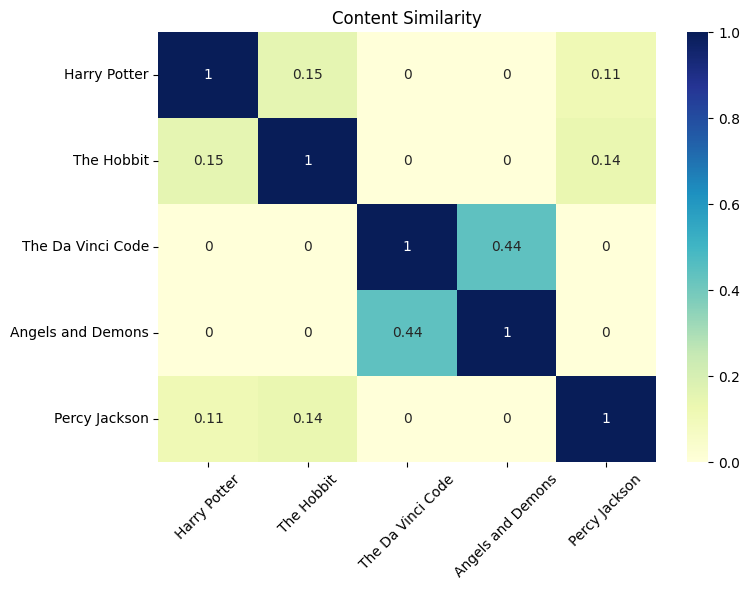

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(content_similarity, xticklabels=books['Title'],yticklabels=books['Title'],annot=True, cmap='YlGnBu')
plt.title('Content Similarity')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
# Collaborative Filtering: Create user-item matrix
user_item_matrix = ratings.pivot_table(index='User_ID', columns='Book_ID', values='Rating').fillna(0)

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)

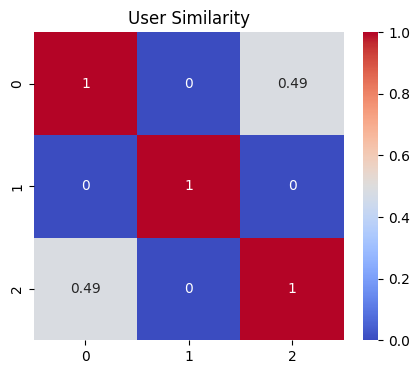

In [22]:
# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(user_similarity, annot=True, cmap='coolwarm')
plt.title("User Similarity")
plt.show()

In [23]:
import numpy as np

# Create a DataFrame from the user similarity matrix
user_sim_df = pd.DataFrame(user_similarity,
                           index=user_item_matrix.index,
                           columns=user_item_matrix.index)

# Get users most similar to User 1 (excluding themselves)
similar_users = user_sim_df.loc[1].sort_values(ascending=False)[1:]

print("\nUsers most similar to User 1:")
print(similar_users)


Users most similar to User 1:
User_ID
3    0.487805
2    0.000000
Name: 1, dtype: float64


In [25]:
print(books.columns)
content_scores = content_similarity[book_index]
user_ratings = user_item_matrix.loc[1]
aligned_ratings = user_ratings.reindex(books['Book_ID']).fillna(0).values
hybrid_score = 0.6 * content_scores + 0.4 * aligned_ratings
top_indices = np.argsort(hybrid_score)[::-1]
recommended_indices = [i for i in top_indices if i != book_index][:10]
print("\nHybrid Recommendations for User 1:")
print(books.iloc[recommended_indices]['Title'].tolist())

Index(['Book_ID', 'Title', 'Author', 'Genre', 'features'], dtype='object')

Hybrid Recommendations for User 1:
['The Hobbit', 'Percy Jackson', 'The Da Vinci Code', 'Angels and Demons']
